In [2]:

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

: 

: 

In [1]:
%pip install  tensorflow -gpu


Usage:   
  /Users/ravisingh/Deep-Learning-Car-Brand/car/bin/python -m pip install [options] <requirement specifier> [package-index-options] ...
  /Users/ravisingh/Deep-Learning-Car-Brand/car/bin/python -m pip install [options] -r <requirements file> [package-index-options] ...
  /Users/ravisingh/Deep-Learning-Car-Brand/car/bin/python -m pip install [options] [-e] <vcs project url> ...
  /Users/ravisingh/Deep-Learning-Car-Brand/car/bin/python -m pip install [options] [-e] <local project path> ...
  /Users/ravisingh/Deep-Learning-Car-Brand/car/bin/python -m pip install [options] <archive url/path> ...

no such option: -g
Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
tf.__version__

: 

: 

In [3]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Datasets/Train'
valid_path = '/content/drive/MyDrive/Datasets/Test'

In [4]:
train_path

'/content/drive/MyDrive/Datasets/Train'

In [5]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


NameError: name 'ResNet50' is not defined

In [ ]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/Datasets/Train/*')

In [ ]:
folders

['/content/drive/MyDrive/Datasets/Train/lamborghini',
 '/content/drive/MyDrive/Datasets/Train/mercedes',
 '/content/drive/MyDrive/Datasets/Train/audi']

In [ ]:
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
model.summary()


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_5[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [ ]:
len(training_set)

2

In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [ ]:
len(test_set)

2

In [ ]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


Epoch 1/50
2/2 [==============================] - 44s 40s/step - loss: 4.8560 - accuracy: 0.3438 - val_loss: 6.8323 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 1s 763ms/step - loss: 7.4674 - accuracy: 0.3906 - val_loss: 2.0483 - val_accuracy: 0.1724
Epoch 3/50
2/2 [==============================] - 1s 738ms/step - loss: 2.0393 - accuracy: 0.4062 - val_loss: 3.6203 - val_accuracy: 0.5172
Epoch 4/50
2/2 [==============================] - 1s 747ms/step - loss: 3.5830 - accuracy: 0.3281 - val_loss: 2.1014 - val_accuracy: 0.2414
Epoch 5/50
2/2 [==============================] - 2s 967ms/step - loss: 1.6255 - accuracy: 0.4219 - val_loss: 3.7756 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 1s 752ms/step - loss: 2.4948 - accuracy: 0.3906 - val_loss: 1.3956 - val_accuracy: 0.4483
Epoch 7/50
2/2 [==============================] - 1s 755ms/step - loss: 1.0878 - accuracy: 0.5625 - val_loss: 2.1161 - val_accuracy: 0.5345
Epoch 8/50
2/2 [=====

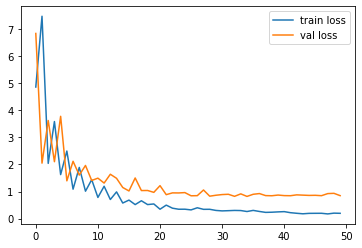

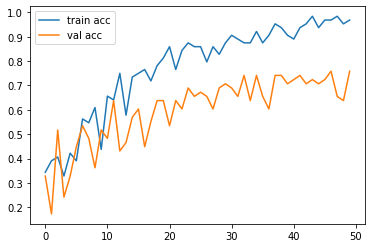

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [ ]:
y_pred = model.predict(test_set)


2/2 [==============================] - 63s 121ms/step


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_resnet50.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/Datasets/Test/lamborghini/11.jpg',target_size=(224,224))


In [ ]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

1/1 [==============================] - 2s 2s/step


array([[0.03915736, 0.02596836, 0.93487424]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 29ms/step
